# Návod použití
## Google Colab
Pokud se nacházíte v rozhraní Google Colab, složka "DMP_Neuronove_site", ve které se nachází tento notebook a program "custom_ann.py", by se měla na Vašem Google Disku nacházet ve výchozí složce "Můj Disk". 

všechny buňky lze naráz spustit pomocí "Běh -> Spustit vše" v horní liště. Samostatné buňky lze spustit pomocí kliknutím na danou buňku a klávesami "Ctrl+Enter". 

Chvilku možná bude trvat, než se notebook připojí k běhovému prostředí, které doporučuji nastavit na vzdálenou GPU pomocí "Běh -> Zvolit běhové prostředí -> GPU".

Program v určité části požádá o přístup k Vašemu Google Disku, aby mohl naimportovat neuronovou síť ze souboru "custom_cnn.py". Pokud povolíte, zbytek programu by měl proběhnout bez problému. Pokud se po udělení přístupu notebook zasekne, odpojte a smažte běh pomocí "Běh -> Odpojit a smazat běh" a spusťte manuálně buňku po buňce.

## Jiné rozhraní
Pokud se nacházíte v jiném rozhraní, pak zakomentujte nebo smažte všechny řádky kódu okomentované "# Pro Colab" a ujistěte se, že všechny použité knihovny máte nainstalované na počítači nebo ve Vašem virtuálním prostředí.

Pro správnou funkci musíte být připojeni k internetu, protože datový soubor Fashion MNIST je nahráván z cloudové databáze knihovny Deeplake.

# Importování knihoven

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Importování mé vlastní neuronové sítě z google drive do google colab

In [ ]:
from google.colab import drive # Pro Colab
drive.mount('/content/gdrive') # Pro Colab

Mounted at /content/gdrive


In [ ]:
import sys # Pro Colab
sys.path.append('/content/gdrive/My Drive/DMP_Neuronove_site') # Pro Colab

In [ ]:
from custom_ann import Artificial_Neural_Network 

# Nahrání a zpracování dat

In [ ]:
# Nahrání a rozdělení dat
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

# Normalizace vstupních dat do hodnot v rozmezí 0-1
X_train_norm, X_test_norm, X_valid_norm = X_train / 255, X_test / 255, X_valid / 255

# Manuální zploštění snímků pro mou vlastní neuronovou síť
X_train_flattened = X_train_norm.reshape(X_train_norm.shape[0], 784, 1)
X_test_flattened = X_test_norm.reshape(X_test_norm.shape[0], 784, 1)
X_valid_flattened = X_valid_norm.reshape(X_valid_norm.shape[0], 784, 1)

# Úprava vstupních dat pro vstup neuronové sítě vytvořené pomocí TensorFlow Keras
X_train_norm = X_train_norm.reshape(X_train_norm.shape[0], 28, 28, 1)
X_test_norm = X_test_norm.reshape(X_test_norm.shape[0], 28, 28, 1)
X_valid_norm = X_valid_norm.reshape(X_valid_norm.shape[0], 28, 28, 1)

# K=ódování výstupních dat do cílových vektorů
y_train_encoded = tf.keras.utils.to_categorical(y_train)
y_test_encoded = tf.keras.utils.to_categorical(y_test)
y_valid_encoded = tf.keras.utils.to_categorical(y_valid)

# Ilustrační snímky z datového souboru Fashion MNIST

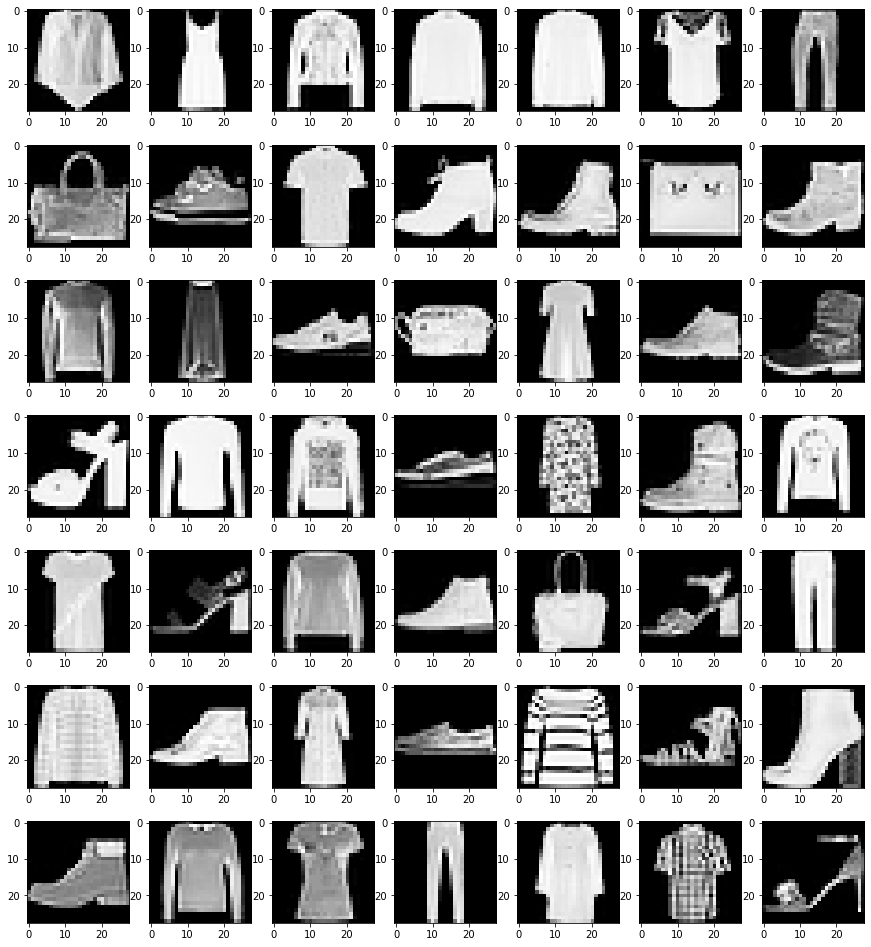

In [ ]:
class_names = ['T_shirt/top', 'Trousers', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

fig, axes = plt.subplots(7, 7, figsize = (15, 17))
for row in axes:
  for axe in row:
    i = np.random.randint(len(X_train))
    axe.imshow(X_train[i], cmap="Greys_r")

# Učení mé vlastní neuronové sítě

In [ ]:
custom_model = Artificial_Neural_Network((784, 32, 16, 10))
custom_model.stochastic_gradient_descent(X_train_flattened, y_train_encoded, 
                                         epochs=30, mini_batch_size=10, learning_rate=0.1, 
                                         validation_data=(X_valid_flattened, y_valid_encoded))

Epoch 1 -> Training loss: 0.45438462246334277, Training accuracy: 0.6829090909090909, Validation loss: 0.44330408046591413, Validation accuracy: 0.6932
Epoch 2 -> Training loss: 0.3601396237071496, Training accuracy: 0.748890909090909, Validation loss: 0.3513637453419897, Validation accuracy: 0.7568
Epoch 3 -> Training loss: 0.3206062284852381, Training accuracy: 0.7798181818181819, Validation loss: 0.31237417425083847, Validation accuracy: 0.7872
Epoch 4 -> Training loss: 0.2939074572556077, Training accuracy: 0.7988363636363637, Validation loss: 0.2858914558880485, Validation accuracy: 0.812
Epoch 5 -> Training loss: 0.2794990468681299, Training accuracy: 0.8078909090909091, Validation loss: 0.2728838300979265, Validation accuracy: 0.8148
Epoch 6 -> Training loss: 0.2646166109492382, Training accuracy: 0.8184181818181818, Validation loss: 0.2599742125665879, Validation accuracy: 0.8254
Epoch 7 -> Training loss: 0.25679309341869694, Training accuracy: 0.8248363636363636, Validation lo

# Vytvoření a učení neuronové sítě pomocí TensorFlow Keras

In [ ]:
keras_model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(32, (3, 3), activation="relu", 
                          input_shape=(28, 28, 1)),
      tf.keras.layers.Conv2D(32, (3, 3), activation="relu"),
      tf.keras.layers.MaxPooling2D((2, 2)),
      tf.keras.layers.Dropout(0.25),
      tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
      tf.keras.layers.MaxPooling2D((2, 2)),
      tf.keras.layers.Dropout(0.25),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(128, activation="relu"),
      tf.keras.layers.Dropout(0.5),
      tf.keras.layers.Dense(64, activation="relu"),
      tf.keras.layers.Dropout(0.5),
      tf.keras.layers.Dense(10, activation="softmax")
])

In [ ]:
keras_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_7 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 12, 12, 32)        0         
                                                                 
 conv2d_8 (Conv2D)           (None, 10, 10, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                  

In [ ]:
keras_model.compile(optimizer = "nadam",
                    loss = "categorical_crossentropy",
                    metrics=["accuracy"])

In [ ]:
keras_model_history = keras_model.fit(X_train_norm, y_train_encoded, epochs=30, validation_data = (X_valid_norm, y_valid_encoded))

Epoch 1/30
1719/1719 [==============================] - 112s 64ms/step - loss: 0.7568 - accuracy: 0.7194 - val_loss: 0.3976 - val_accuracy: 0.8520
Epoch 2/30
1719/1719 [==============================] - 104s 60ms/step - loss: 0.4808 - accuracy: 0.8293 - val_loss: 0.3114 - val_accuracy: 0.8826
Epoch 3/30
1719/1719 [==============================] - 106s 62ms/step - loss: 0.4076 - accuracy: 0.8584 - val_loss: 0.2778 - val_accuracy: 0.8948
Epoch 4/30
1719/1719 [==============================] - 104s 60ms/step - loss: 0.3725 - accuracy: 0.8727 - val_loss: 0.2681 - val_accuracy: 0.8978
Epoch 5/30
1719/1719 [==============================] - 111s 64ms/step - loss: 0.3446 - accuracy: 0.8796 - val_loss: 0.2705 - val_accuracy: 0.8990
Epoch 6/30
1719/1719 [==============================] - 103s 60ms/step - loss: 0.3293 - accuracy: 0.8853 - val_loss: 0.2515 - val_accuracy: 0.9060
Epoch 7/30
1719/1719 [==============================] - 103s 60ms/step - loss: 0.3194 - accuracy: 0.8894 - val_loss: 0

# Testování a porovnání výsledných modelů

## Porovnání průběhu učení neuronových sítí

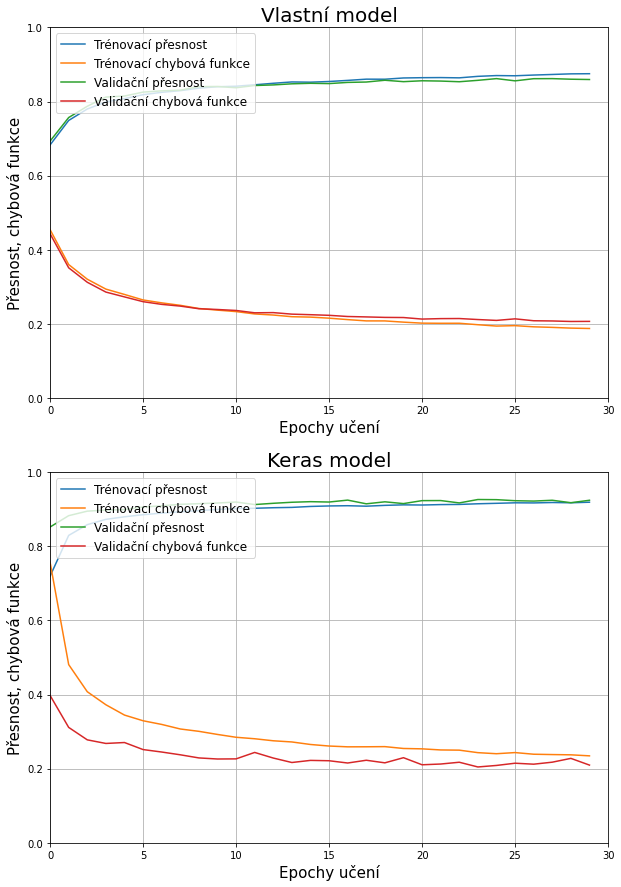

In [ ]:
histories = {"Vlastní model": custom_model.history, "Keras model": keras_model_history.history}
fig, axes = plt.subplots(len(histories), 1, figsize = (10, 15))
for index, (title, history) in enumerate(histories.items()):
  axes[index].set_title(title, fontsize=20)
  axes[index].set_xlabel('Epochy učení', fontsize=15)
  axes[index].set_ylabel('Přesnost, chybová funkce', fontsize=15)
  axes[index].plot(history["accuracy"])
  axes[index].plot(history["loss"])
  axes[index].plot(history["val_accuracy"])
  axes[index].plot(history["val_loss"])
  axes[index].grid(True)
  axes[index].set_xlim(0, len(history["accuracy"]))
  axes[index].set_ylim(0, 1)
  axes[index].legend(["Trénovací přesnost", "Trénovací chybová funkce", "Validační přesnost",  "Validační chybová funkce"], loc="upper left", fontsize=12)

## Testování modelů

In [ ]:
custom_model.evaluate(X_test_flattened, y_test_encoded)

Test loss: 0.22970746994031216, Test accuracy: 0.8438


In [ ]:
keras_model.evaluate(X_test_norm, y_test_encoded)

313/313 [==============================] - 5s 17ms/step - loss: 0.2367 - accuracy: 0.9175


[0.2367277592420578, 0.9175000190734863]

# Ilustrační predikce

## Ilustrační predikce mé vlastní neuronové sítě

In [ ]:
predictions = custom_model.predict(X_test_flattened).argmax(axis=1)
predictions

array([9, 2, 1, ..., 8, 1, 5])

### Správné predikce

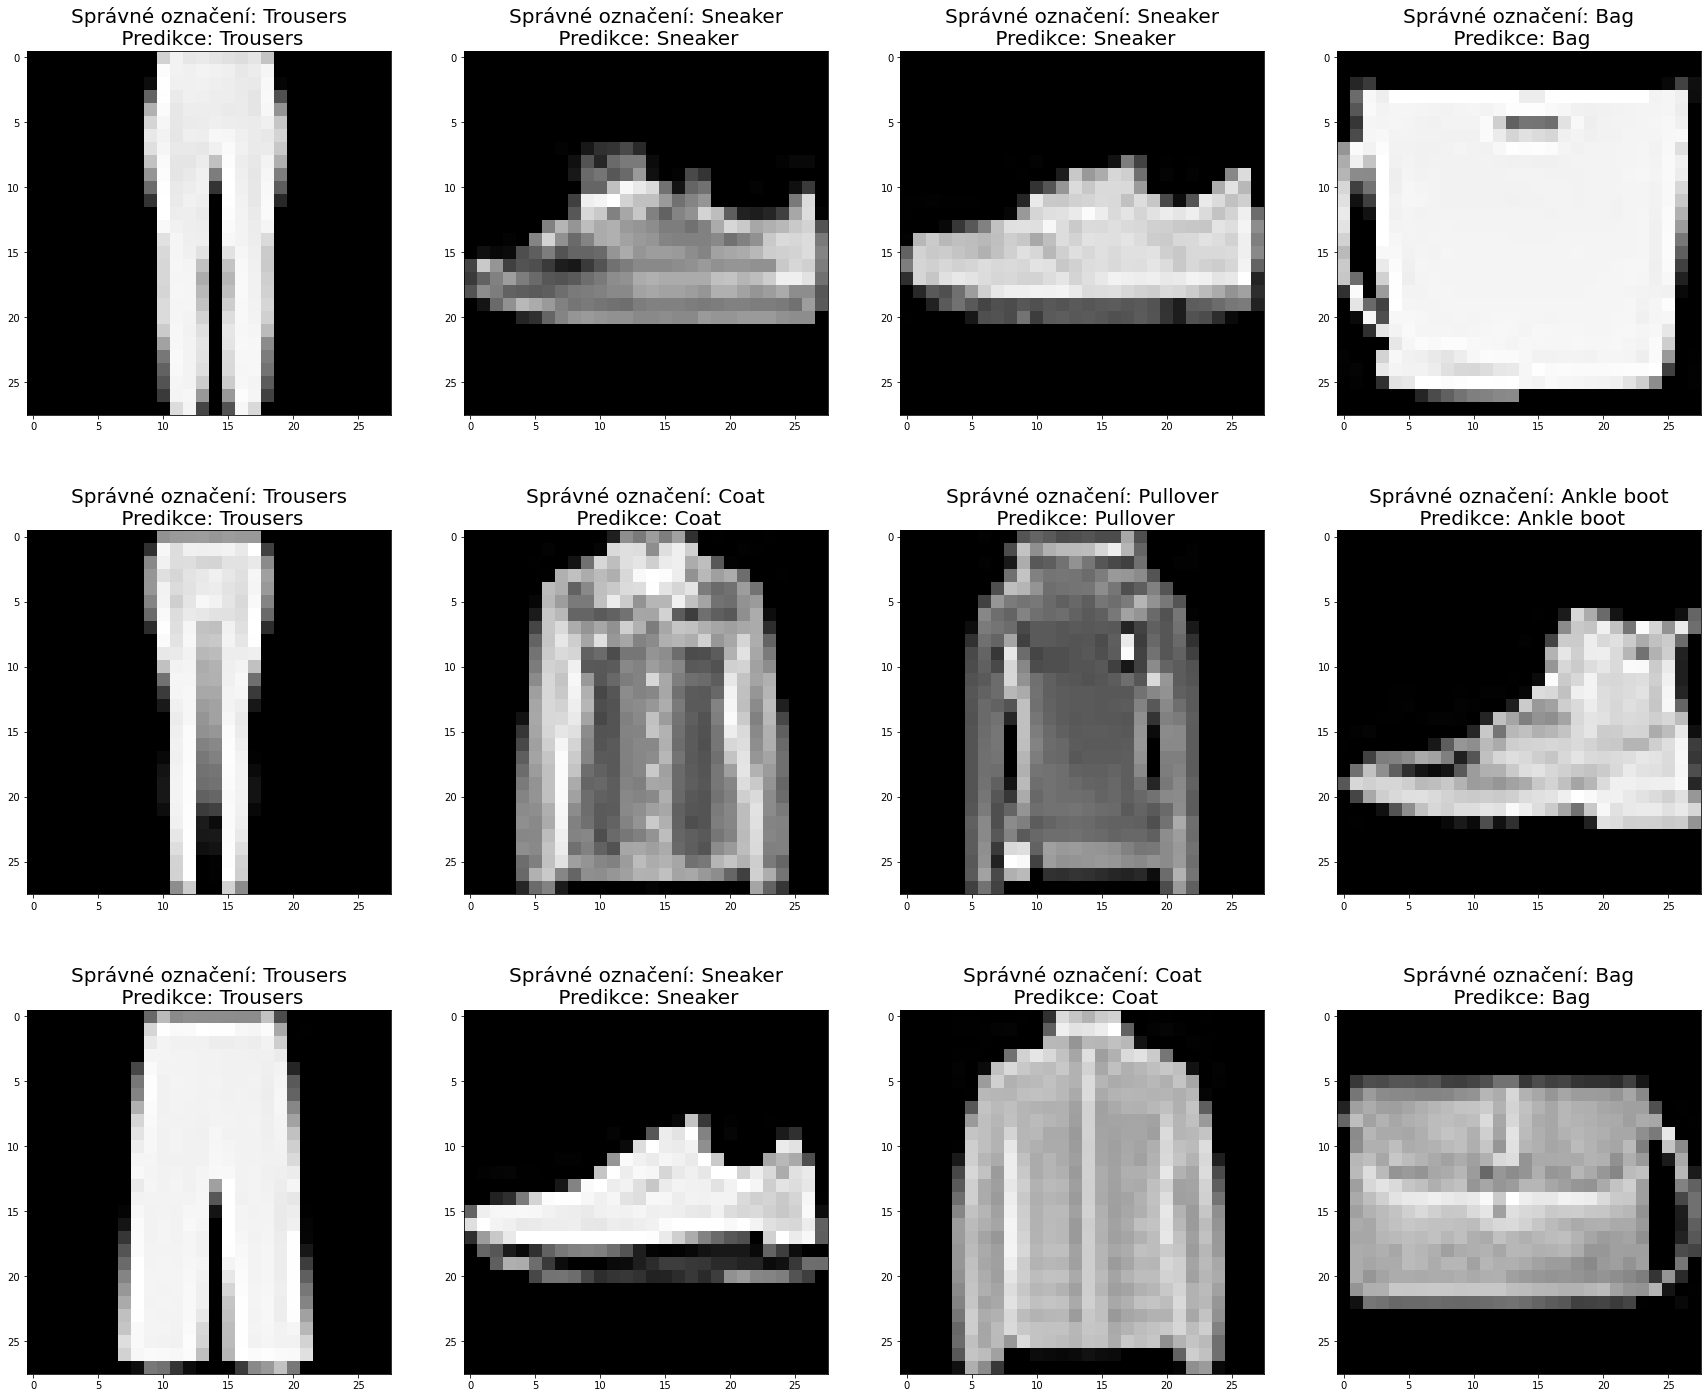

In [ ]:
fig, axes = plt.subplots(3, 4, figsize = (, 25))
for row in axes:
  for axe in row:
    i = np.random.randint(len(predictions))
    while y_test[i] != predictions[i]:
      i = np.random.randint(len(predictions))
    axe.imshow(X_test[i], cmap="Greys_r")
    axe.set_title(f"Správné označení: {class_names[y_test[i]]}\n Predikce: {class_names[predictions[i]]}"

### Špatné predikce

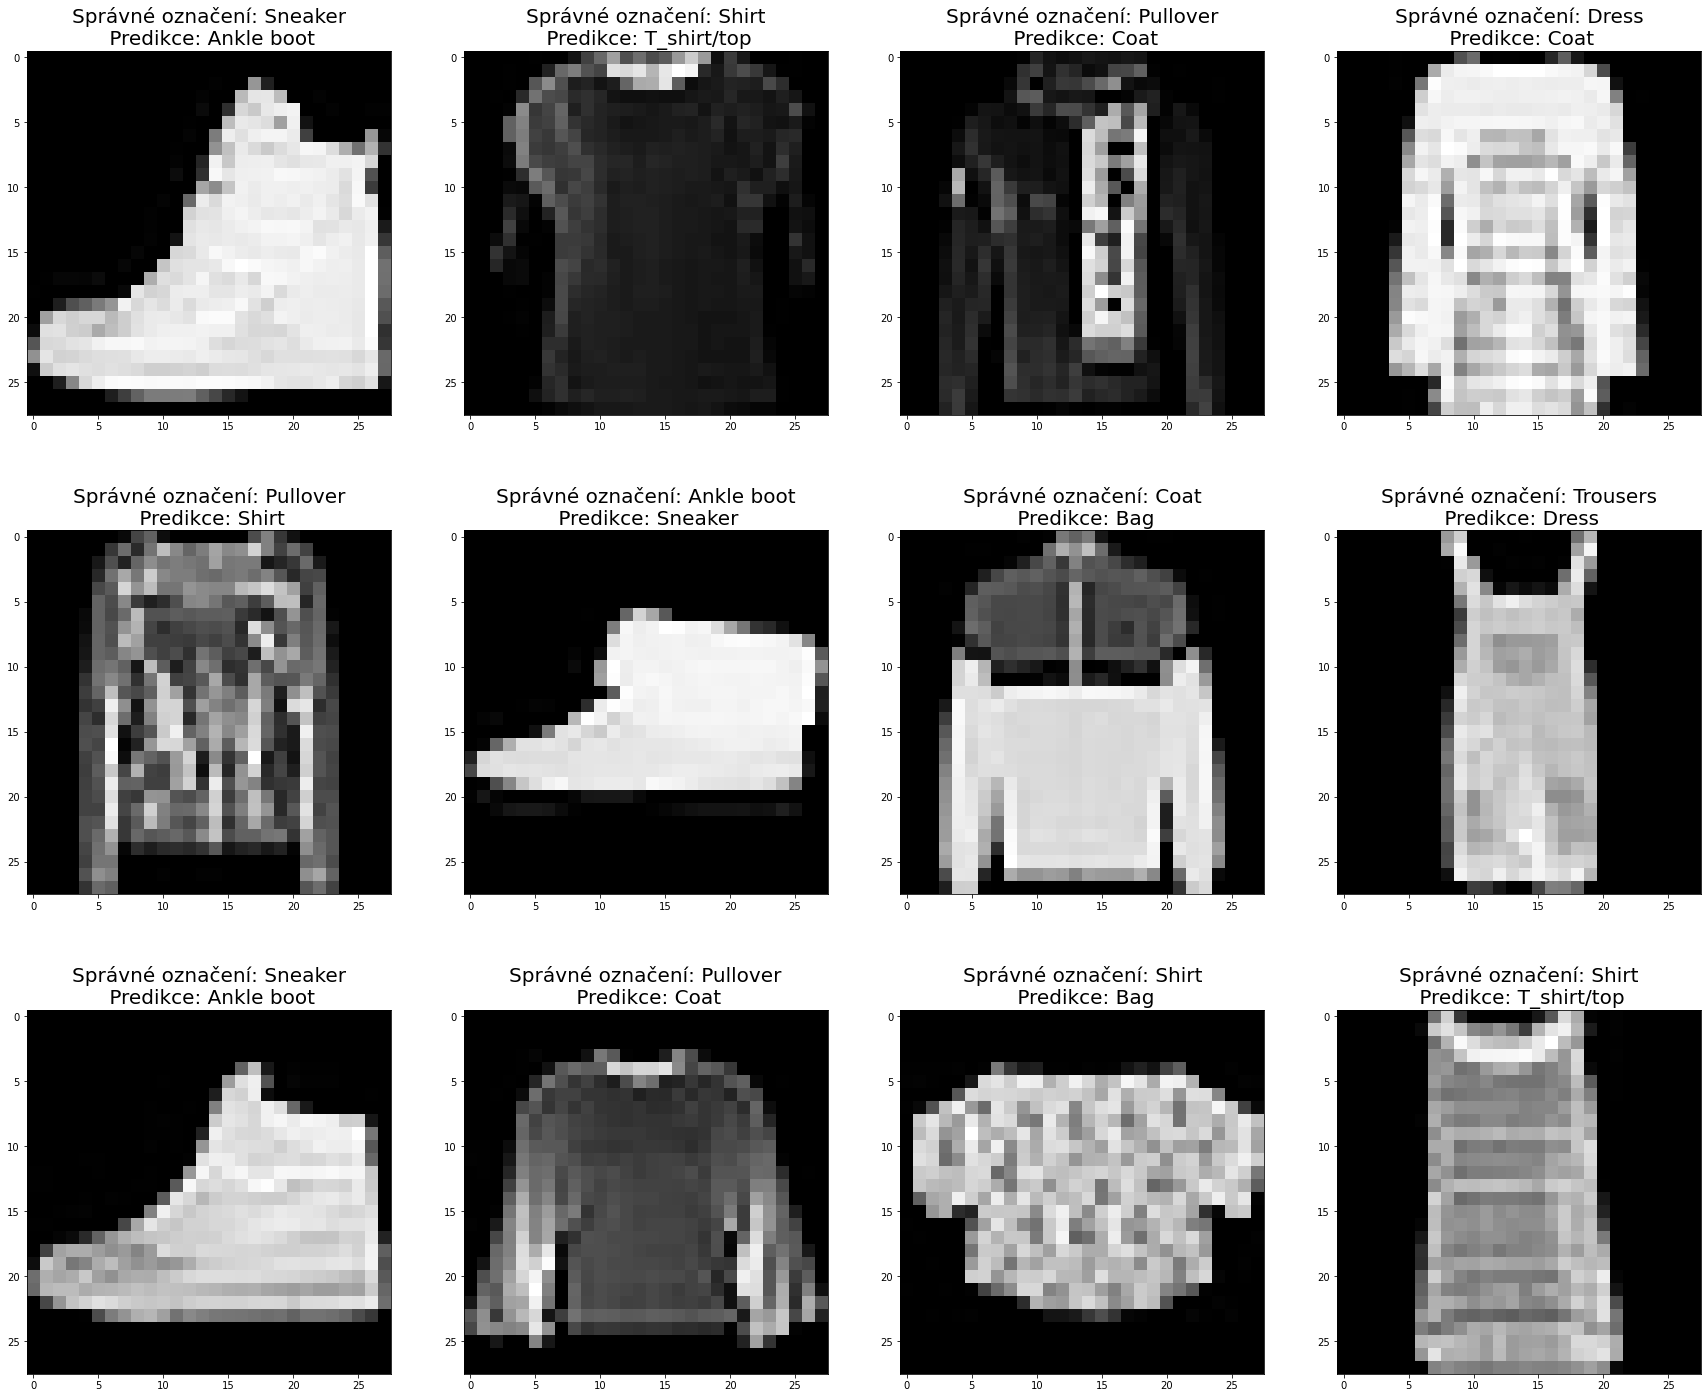

In [ ]:
fig, axes = plt.subplots(3, 4, figsize = (30, 25))
for row in axes:
  for axe in row:
    i = np.random.randint(len(predictions))
    while y_test[i] == predictions[i]:
      i = np.random.randint(len(predictions))
    axe.imshow(X_test[i], cmap="Greys_r")
    axe.set_title(f"Správné označení: {class_names[y_test[i]]}\n Predikce: {class_names[predictions[i]]}", fontsize=20)

## Ilustrační predikce neuronové sítě vytvořené pomocí TensorFlow Keras

In [ ]:
predictions = keras_model.predict(X_test).argmax(axis=1)
predictions


313/313 [==============================] - 4s 13ms/step


array([5, 2, 1, ..., 6, 1, 5])

### Správné predikce

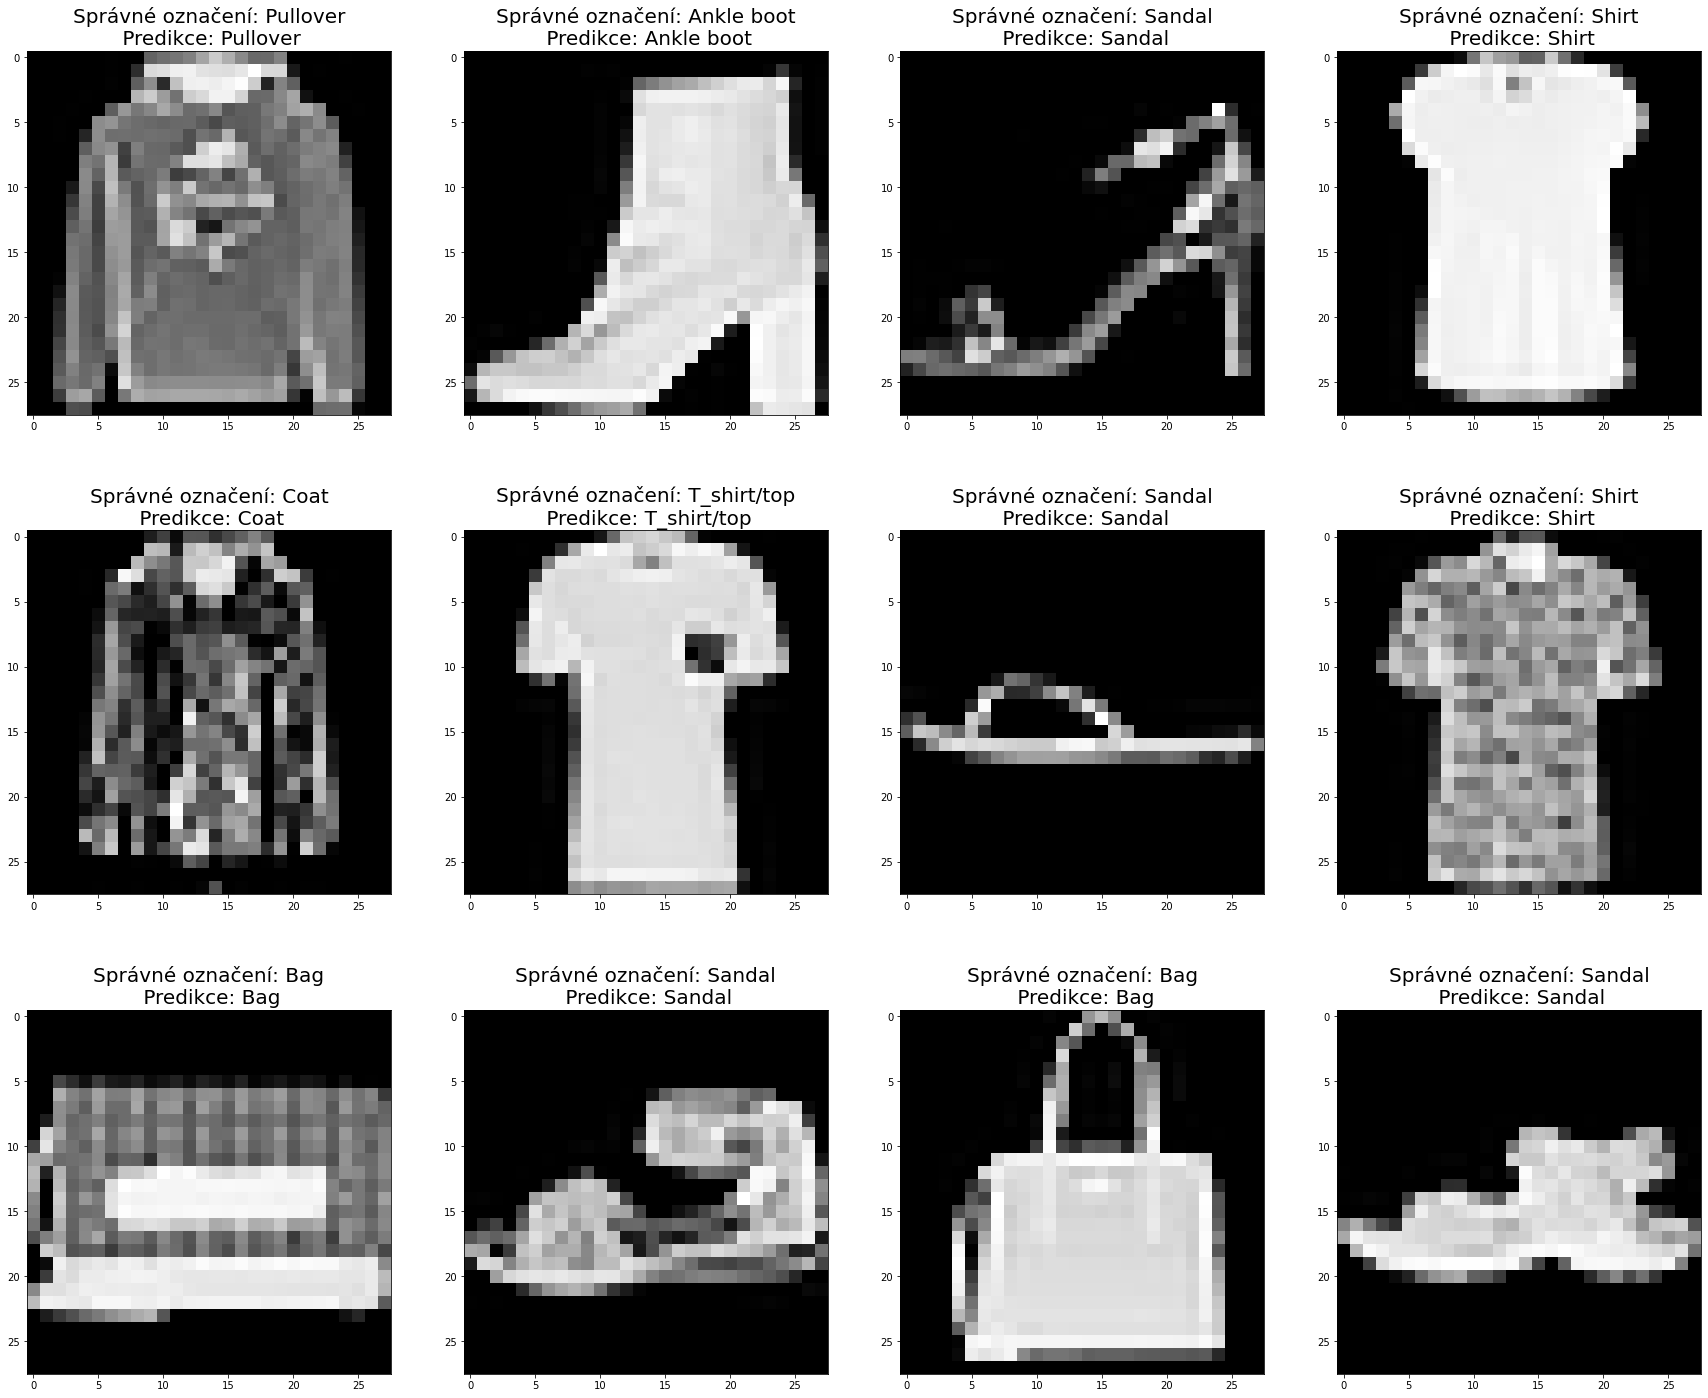

In [ ]:
fig, axes = plt.subplots(3, 4, figsize = (30, 25))
for row in axes:
  for axe in row:
    i = np.random.randint(len(predictions))
    while y_test[i] != predictions[i]:
      i = np.random.randint(len(predictions))
    axe.imshow(X_test[i], cmap="Greys_r")
    axe.set_title(f"Správné označení: {class_names[y_test[i]]}\n Predikce: {class_names[predictions[i]]}", fontsize=20)

### Špatné predikce

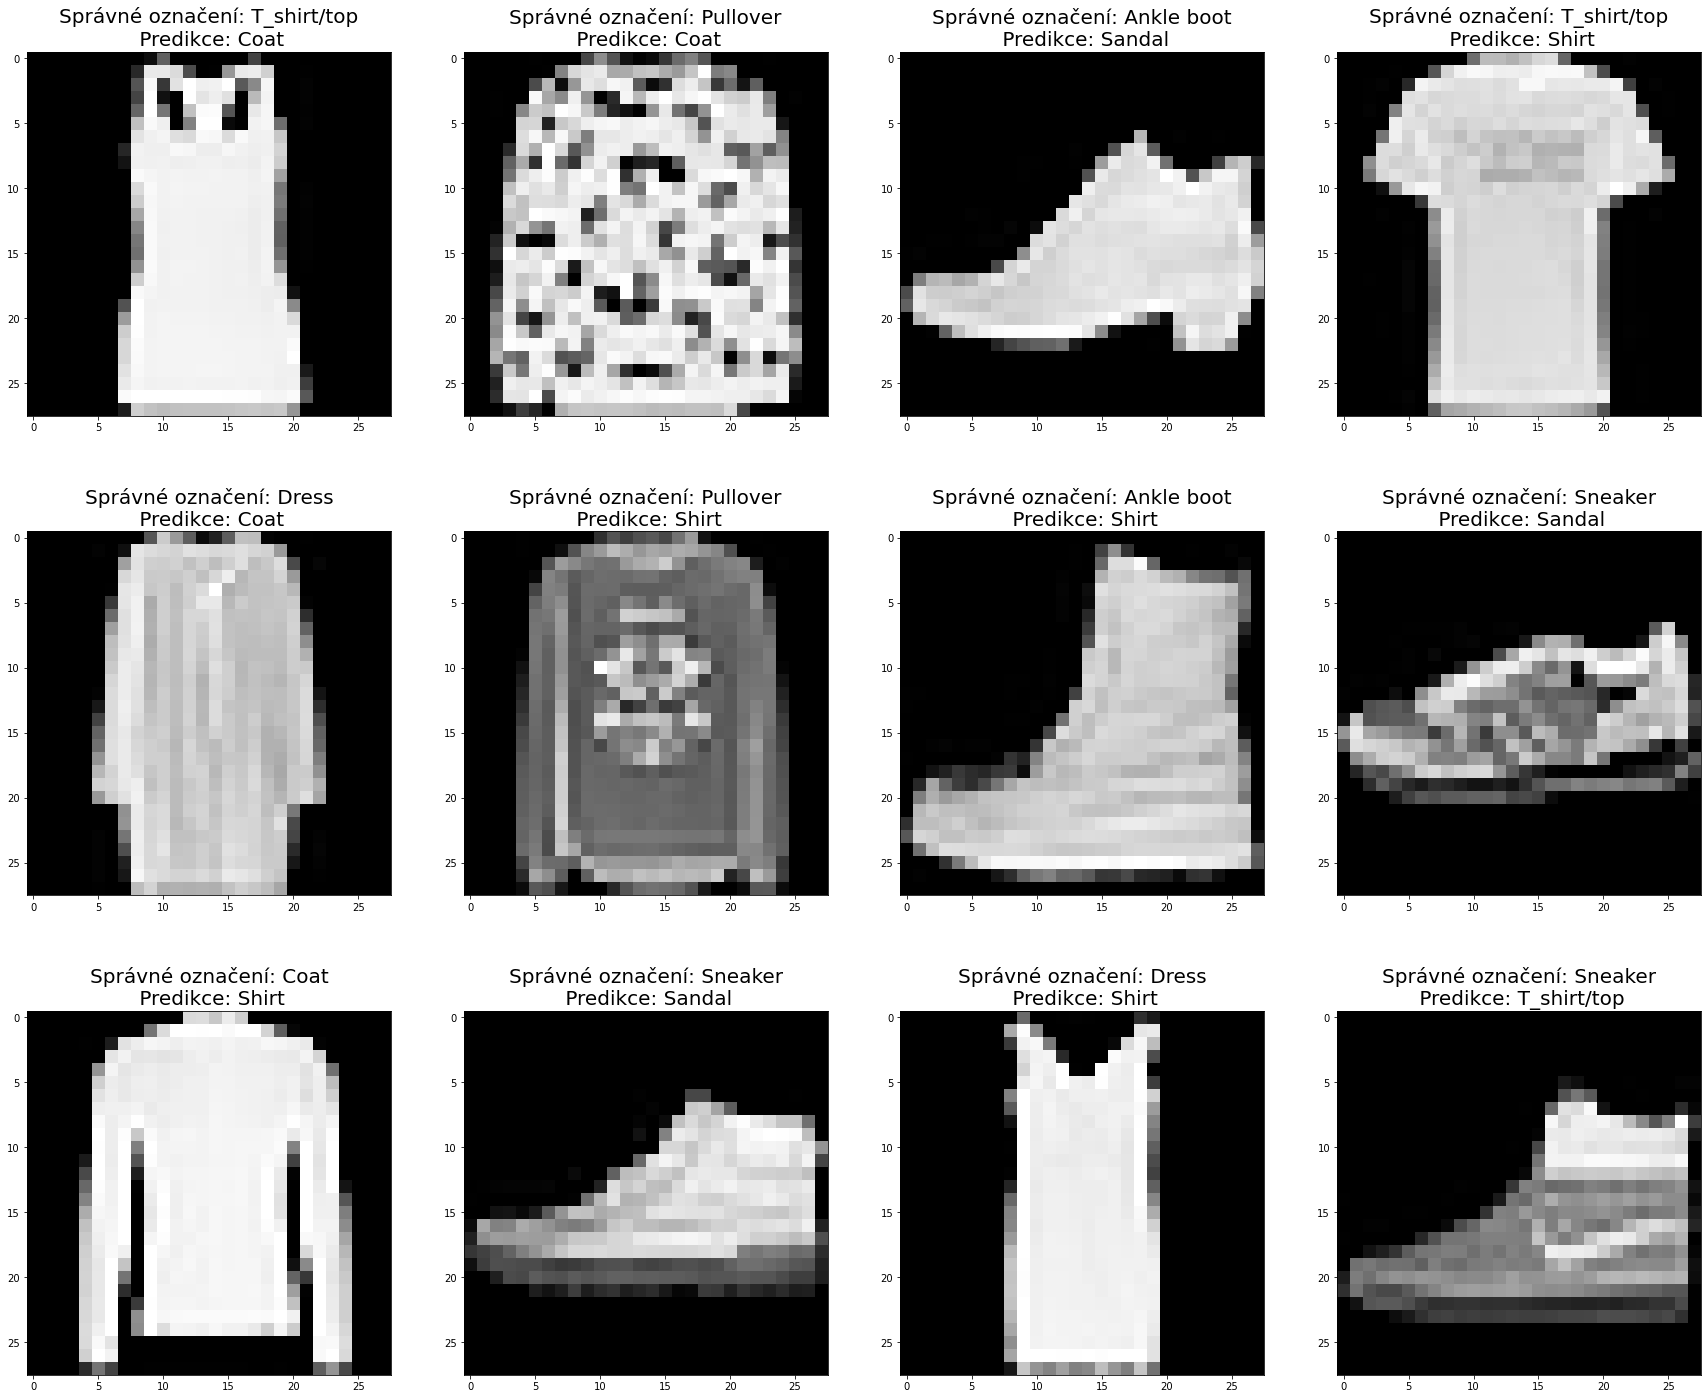

In [ ]:
fig, axes = plt.subplots(3, 4, figsize = (30, 25))
for row in axes:
  for axe in row:
    i = np.random.randint(len(predictions))
    while y_test[i] == predictions[i]:
      i = np.random.randint(len(predictions))
    axe.imshow(X_test[i], cmap="Greys_r")
    axe.set_title(f"Správné označení: {class_names[y_test[i]]}\n Predikce: {class_names[predictions[i]]}", fontsize=20)